In [1]:
from stylus.retriever.rag import get_all_adapters

all_adapters = get_all_adapters()

Fetching adapter metadata...


In [2]:
TAG_CATEGORIES = ['character', 'celebrity', 'concept', 'poses', 'style', 'clothing', 'background', 'buildings', 'vehicle', 'objects', 'animal', 'assets']
tag_dictionary = {tag: 0 for tag in TAG_CATEGORIES}
for counter, a in enumerate(all_adapters):
    for t in TAG_CATEGORIES:
        if t in a.tags:
            tag_dictionary[t] += 1
# Sort tag_dictionary by value
sorted_tag_dictionary = dict(sorted(tag_dictionary.items(), key=lambda item: item[1], reverse=True))
sorted_tag_dictionary

{'character': 42457,
 'celebrity': 11245,
 'style': 9489,
 'clothing': 4757,
 'concept': 3089,
 'background': 840,
 'buildings': 669,
 'vehicle': 528,
 'poses': 473,
 'animal': 333,
 'objects': 332,
 'assets': 180}

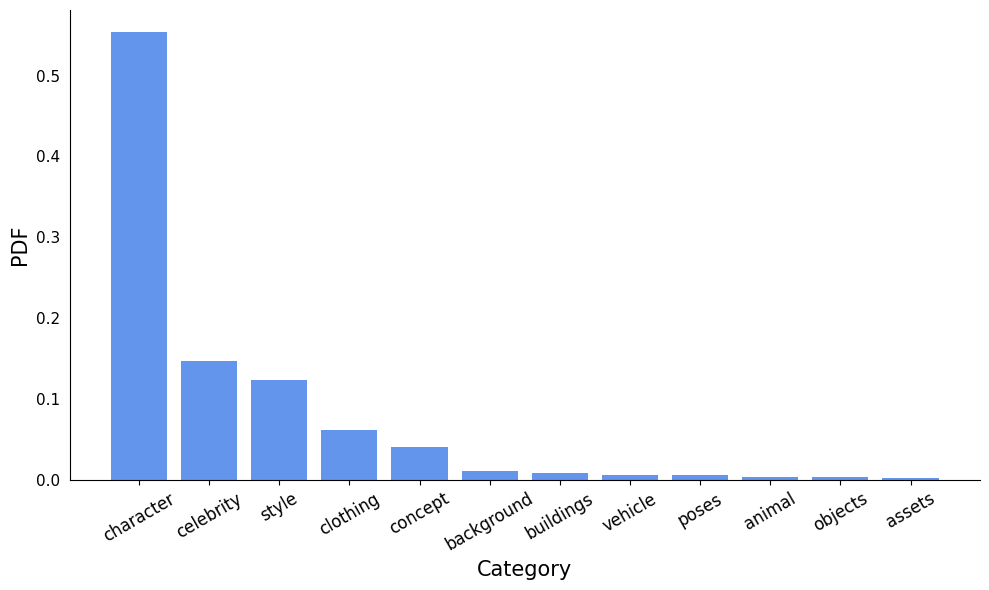

In [3]:
from matplotlib import pyplot as plt
# Total sum of values
total = 76724

# Calculate fractions
fractions = {key: value / total for key, value in sorted_tag_dictionary.items()}

# Creating bar chart
plt.figure(figsize=(10, 6))

ax = plt.subplot(111)

# remove upper line and right line
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False)


plt.bar(fractions.keys(), fractions.values(), color='cornflowerblue')
plt.xlabel('Category', size=15)
plt.ylabel('PDF', size=15)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig('figures/category.pdf', format="pdf", dpi=300, bbox_inches='tight')

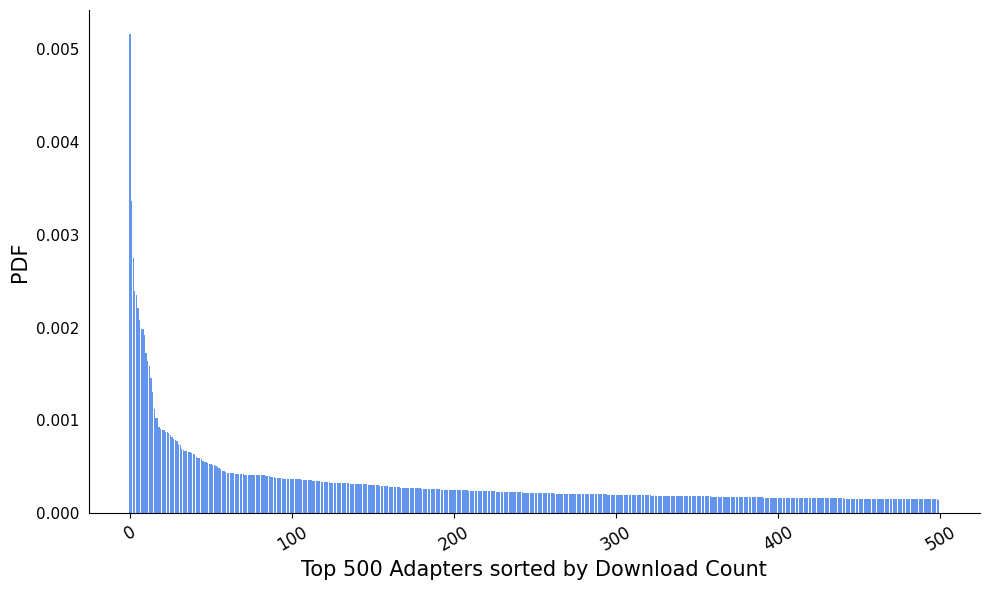

In [4]:
# Rank adapters by popularity
# sort them by donwload count
# Get donwload count for all adapters
download_counts = [a.stats['downloadCount'] for a in all_adapters]
# normalize into probability
total_downloads = sum(download_counts)
download_counts = [d / total_downloads for d in download_counts]
# Sort it by pdf
sorted_download_counts = sorted(download_counts, reverse=True)

# Plot the pdf
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
# remove upper line and right line
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False)
# Show barchart for top 250 adapters
plt.bar(range(500), sorted_download_counts[:500], color='cornflowerblue')

plt.xlabel('Top 500 Adapters sorted by Download Count', size=15)
plt.ylabel('PDF', size=15)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig('figures/popularity.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()